# **Final Project**

## **A sentiment Analysis using an IMDB data set of movies reviews**

### The libraries used to treatment of the texts and machine learning techniques were concentred in sklearn and nltk with others libs plots like matplotlib, seaborn, roc curve

### The link of data set: <https://www.kaggle.com/luisfredgs/imdb-ptbr>
 

### **Imports**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import tokenize
import seaborn as sns
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import unidecode
%matplotlib inline


### **Viewing the initial dataset**

In [ ]:
reviews = pd.read_csv("/content/imdb-reviews-pt-br.csv")
reviews.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


### **Eliminating everything that will not be use for the analysis**

In [ ]:
reviews.drop(['id', 'text_pt'], axis = 1, inplace = True)

In [ ]:
reviews.head()

,text_en,sentiment
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures movies is not a fitting word fo...,neg


### **Making some changes to better reading**

In [ ]:
reviews.rename(columns = {'text_en': 'Reviews', 'sentiment': 'Sentiment'}, inplace = True)

In [ ]:
reviews.head()

,Reviews,Sentiment
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures movies is not a fitting word fo...,neg


### **Adding a column to the tag of sentiment of the texts in binary**

#### **We replace "pos" for 1 and "neg" for 0**

In [ ]:
sentiment_binary = reviews.Sentiment.replace(['neg', 'pos'], [0, 1])
reviews['sentiment_binary'] = sentiment_binary

In [ ]:
reviews.head()

,Reviews,Sentiment,sentiment_binary
0,Once again Mr. Costner has dragged out a movie...,neg,0
1,This is an example of why the majority of acti...,neg,0
2,"First of all I hate those moronic rappers, who...",neg,0
3,Not even the Beatles could write songs everyon...,neg,0
4,Brass pictures movies is not a fitting word fo...,neg,0


In [ ]:
reviews.tail()

,Reviews,Sentiment,sentiment_binary
49454,"Seeing as the vote average was pretty low, and...",pos,1
49455,"The plot had some wretched, unbelievable twist...",pos,1
49456,I am amazed at how this movieand most others h...,pos,1
49457,A Christmas Together actually came before my t...,pos,1
49458,Working-class romantic drama from director Mar...,pos,1


## **Exploring a little of the data set**

#### **The two classes are balanced**

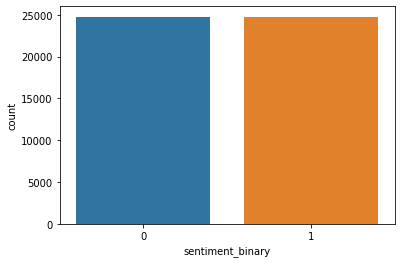

In [ ]:
sns.countplot(data = reviews, x = 'sentiment_binary')

#### **Number of examples: 49458**

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Reviews           49459 non-null  object
 1   Sentiment         49459 non-null  object
 2   sentiment_binary  49459 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
reviews.Reviews[0]

'Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costners character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks hes better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutchers ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.'

In [ ]:
reviews.Reviews[49000]

'Fifteen years later and Paris Is Burning is still aflame. This is a classic in black gay films, right up there with the other honorary black gay films, The Color Purple and Mahoganoy. This seminal work captures underground and underclass i.e."underserved black and Latin gay culture and community like no other work before or since, including all the sentimental Harlem Rennaissance gay retrospectives and renderings. Theyre good, but this is the best dare I say the only "real" film youll find on the subject. Its Relentlessy Cunty the classic house music inventioncomes to Hollywood, non-stop, hilarious camp like only we do it and dead-on social critique. All this by a white female director who obviously must have been a Sister Gurl or Mizz Thing in a former life. I could go on, but I think you get the point by now: I love this movie!'

#### **We need to vectorize the data as we can see, it's all texts, we'll use some NLP (Natural language proccess) for the propose that algorithms of machine learning understand and can make predictions**

#### **Without any techniques to treat the texts (for while), we need to restric the number maximum of features using vectorize tecnique**

In [ ]:
vector = CountVectorizer(max_features = 100)
BagOfWords = vector.fit_transform(reviews.Reviews)



## **Building a classification function**

In [ ]:
def classification_text(text, column_text, column_sentiment, modelo):

    vector = CountVectorizer(max_features = 100, lowercase = True)
    BagOfWords = vector.fit_transform(text[column_text])
    train_X, test_X, train_y, test_y = train_test_split(BagOfWords, text[column_sentiment], test_size = 0.33, random_state = 42)
    model = modelo
    if model == GaussianNB() or MultinomialNB():
      model.fit(train_X.todense(), train_y)
      Accuracy = model.score(test_X.todense(), test_y)*100
      print(f'Accuracy: {Accuracy:.2f} %')
    else:
      model.fit(train_X, train_y)
      Accuracy = model.score(test_X, test_y)*100
      print(f'Accuracy: {Accuracy:.2f} %')


    

### **Logistic Regression - First classification**

In [ ]:
classification_text(reviews, 'Reviews', 'sentiment_binary', LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.20 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Naive Baiyes - First classification** 

In [ ]:
classification_text(reviews, 'Reviews', 'sentiment_binary', GaussianNB())

Accuracy: 68.02 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
classification_text(reviews, 'Reviews', 'sentiment_binary', MultinomialNB())

Accuracy: 68.25 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Random Forest - First classification**

In [ ]:
classification_text(reviews, 'Reviews', 'sentiment_binary', RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 71.26 %


### **Support Vector Machine - First classification**

In [ ]:
classification_text(reviews, 'Reviews', 'sentiment_binary', SVC())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.69 %


### **Creating a wordcloud with all words of the dataset**

In [ ]:
all_words = ' '.join([text for text in reviews.Reviews])

In [ ]:
len(all_words)

60808617

In [ ]:
model_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False)
word_cloud = model_cloud.generate(all_words)

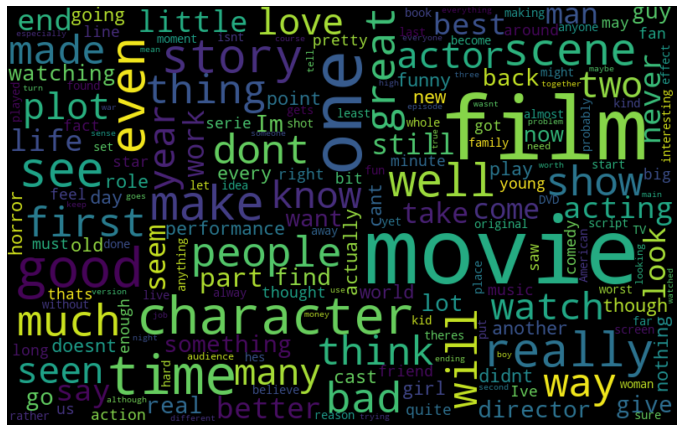

In [ ]:
fig = plt.figure(figsize = (12,8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
def positive_words_cloud(text, column_text):

    positive = text.query("Sentiment == 'pos'")
    all_words = ' '.join([text for text in positive[column_text]])
    model_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False)
    word_cloud = model_cloud.generate(all_words)
    fig = plt.figure(figsize = (12,8))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

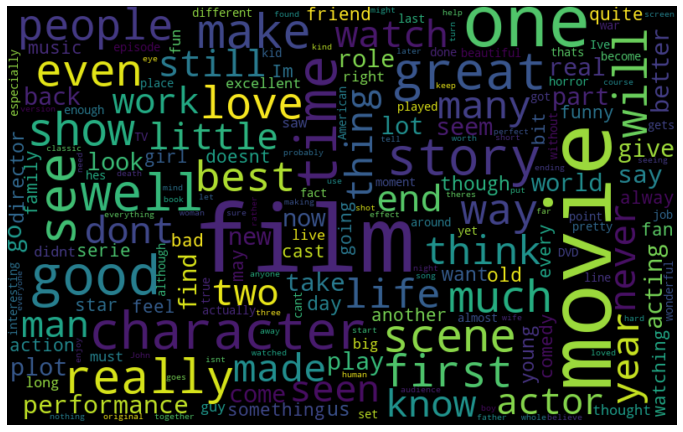

In [ ]:
positive_words_cloud(reviews,'Reviews')

In [ ]:
def negative_words_cloud(text, column_text):

    negative = text.query("Sentiment == 'neg'")
    all_words = ' '.join([text for text in negative[column_text]])
    model_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False)
    word_cloud = model_cloud.generate(all_words)
    fig = plt.figure(figsize = (12,8))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

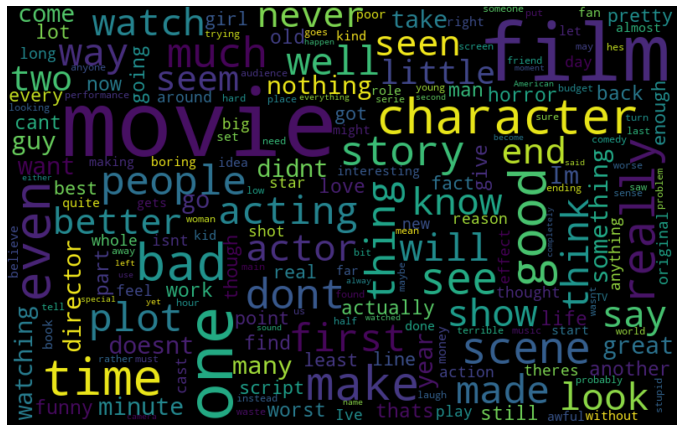

In [ ]:
negative_words_cloud(reviews, 'Reviews')

### **As we can see, the wordclouds figures doesn't say anything about the sentiment of the texts, because are so many noises, we need first of all make some treatments in the corpus**

## **Tokenize all corpus**

In [ ]:
token = tokenize.WhitespaceTokenizer().tokenize(all_words)


### **See the frequency of the words in all corpus**

In [ ]:
frequency = nltk.FreqDist(token)

In [ ]:
df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})

In [ ]:
df_frequency.head()

,Word,Frequency
0,Once,598
1,again,3283
2,Mr.,1912
3,Costner,57
4,has,30803


### **Viewing the 10 most frequency words in the corpus**

In [ ]:
df_frequency.nlargest(n = 10, columns = 'Frequency')

,Word,Frequency
16,the,541903
7,a,294097
41,and,290407
21,of,269316
87,to,248555
59,is,194182
39,in,162011
27,I,131434
154,that,120419
99,this,110592


### **Building a function to plot a distribuition of frequency of the words**

In [ ]:
def pareto(text, column_text, quantity):
    
    all_words = ' '.join([text for text in text[column_text]])
    token = tokenize.WhitespaceTokenizer().tokenize(all_words)
    frequency = nltk.FreqDist(token)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(n = quantity, columns = 'Frequency')
    plt.figure(figsize = (12,8))
    ax = sns.barplot(data = df_frequency, x = 'Word', y = 'Frequency')
    ax.set_xlabel('Words')
    ax.set_ylabel('Frequency')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis = 'x', colors = 'black')
    ax.tick_params(axis = 'y', colors = 'black')
    plt.show()

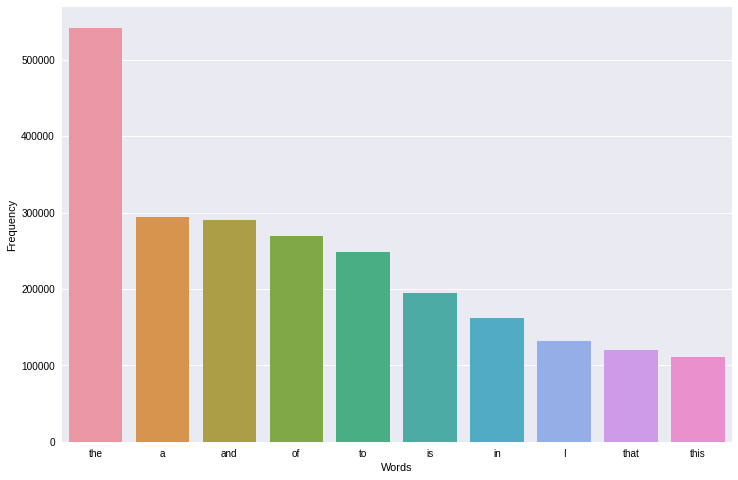

In [ ]:
pareto(reviews, 'Reviews', 10)

## **Applying NLTK**

In [ ]:
irrelevant_words = nltk.corpus.stopwords.words('english')

In [ ]:
print(irrelevant_words[1:21], end =  " ")

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself'] 

### **Treatment 1 - Eliminating stopwords**

In [ ]:
new_frases = list()
for opinion in reviews.Reviews:
    news = list()
    word_text = tokenize.WhitespaceTokenizer().tokenize(opinion)
    for word in word_text:
        if word not in irrelevant_words:
            news.append(word)
    new_frases.append(' '.join(news))


reviews['treatment1'] = new_frases
    

In [ ]:
reviews.head()

,Reviews,Sentiment,sentiment_binary,treatment1
0,Once again Mr. Costner has dragged out a movie...,neg,0,Once Mr. Costner dragged movie far longer nece...
1,This is an example of why the majority of acti...,neg,0,This example majority action films same. Gener...
2,"First of all I hate those moronic rappers, who...",neg,0,"First I hate moronic rappers, couldnt act gun ..."
3,Not even the Beatles could write songs everyon...,neg,0,Not even Beatles could write songs everyone li...
4,Brass pictures movies is not a fitting word fo...,neg,0,Brass pictures movies fitting word really some...


In [ ]:
reviews.Reviews[0]

'Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costners character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks hes better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutchers ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.'

### **First text after treatment 1**

In [ ]:
reviews.treatment1[0]

'Once Mr. Costner dragged movie far longer necessary. Aside terrific sea rescue sequences, I care characters. Most us ghosts closet, Costners character realized early on, forgotten much later, time I care. The character really care cocky, overconfident Ashton Kutcher. The problem comes kid thinks hes better anyone else around shows signs cluttered closet. His obstacle appears winning Costner. Finally well past half way point stinker, Costner tells us Kutchers ghosts. We told Kutcher driven best prior inkling foreshadowing. No magic here, I could keep turning hour in.'

### **Logistic Regression classifier after treatment 1**

In [ ]:
classification_text(reviews, 'treatment1', 'sentiment_binary', LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.51 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Naive Baiyes classifier after treatment 1**

In [ ]:
classification_text(reviews, 'treatment1', 'sentiment_binary', GaussianNB())

Accuracy: 68.42 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
classification_text(reviews, 'treatment1', 'sentiment_binary', MultinomialNB())

Accuracy: 71.76 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Random forest classifier after treatment 1**

In [ ]:
classification_text(reviews, 'treatment1', 'sentiment_binary', RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 72.20 %


### **Support vector machine after treatment 1**

In [ ]:
classification_text(reviews, 'treatment1', 'sentiment_binary', SVC())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.59 %


## **The 10 most words that appear in the corpus after treatment 1**

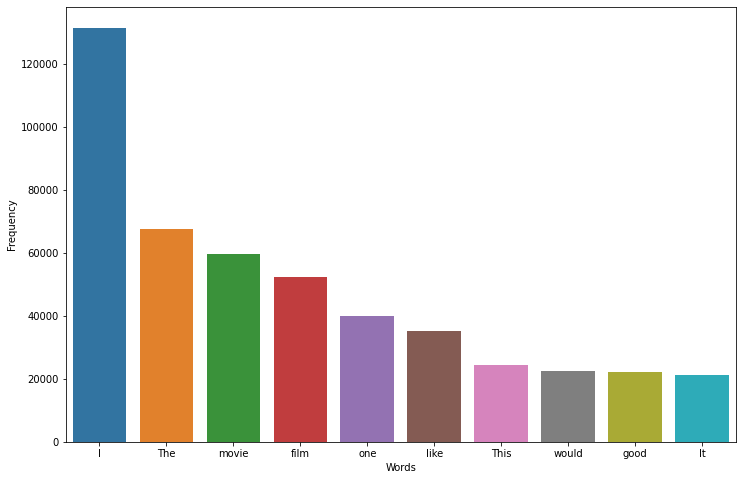

In [ ]:
pareto(reviews, 'treatment1', 10)

### **Treatment 2 - Eliminating pontuaction in the corpus**

In [ ]:
punctuationn = list()
for p in punctuation:
    punctuationn.append(p)

In [ ]:
len(punctuationn)

32

In [ ]:
more_irrelevants = punctuationn + irrelevant_words

In [ ]:
new_treatment = list()
for opinion in reviews.treatment1:
    news2 = list()
    word_text2 = tokenize.WordPunctTokenizer().tokenize(opinion)
    for word in word_text2:
        if word not in more_irrelevants:
            news2.append(word)
    new_treatment.append(" ".join(news2))

reviews['treatment2'] = new_treatment

In [ ]:
reviews.head()

,Reviews,Sentiment,sentiment_binary,treatment1,treatment2
0,Once again Mr. Costner has dragged out a movie...,neg,0,Once Mr. Costner dragged movie far longer nece...,Once Mr Costner dragged movie far longer neces...
1,This is an example of why the majority of acti...,neg,0,This example majority action films same. Gener...,This example majority action films Generic bor...
2,"First of all I hate those moronic rappers, who...",neg,0,"First I hate moronic rappers, couldnt act gun ...",First I hate moronic rappers couldnt act gun p...
3,Not even the Beatles could write songs everyon...,neg,0,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...
4,Brass pictures movies is not a fitting word fo...,neg,0,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...


In [ ]:
reviews.treatment1[0]

'Once Mr. Costner dragged movie far longer necessary. Aside terrific sea rescue sequences, I care characters. Most us ghosts closet, Costners character realized early on, forgotten much later, time I care. The character really care cocky, overconfident Ashton Kutcher. The problem comes kid thinks hes better anyone else around shows signs cluttered closet. His obstacle appears winning Costner. Finally well past half way point stinker, Costner tells us Kutchers ghosts. We told Kutcher driven best prior inkling foreshadowing. No magic here, I could keep turning hour in.'

## **One example after treatment 2**

In [ ]:
reviews.treatment2[0]

'Once Mr Costner dragged movie far longer necessary Aside terrific sea rescue sequences I care characters Most us ghosts closet Costners character realized early forgotten much later time I care The character really care cocky overconfident Ashton Kutcher The problem comes kid thinks hes better anyone else around shows signs cluttered closet His obstacle appears winning Costner Finally well past half way point stinker Costner tells us Kutchers ghosts We told Kutcher driven best prior inkling foreshadowing No magic I could keep turning hour'

### **Logistic regression after treatment 2**

In [ ]:
classification_text(reviews, 'treatment2', 'sentiment_binary', LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.53 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Naive Baiyes after treatment 2**

In [ ]:
classification_text(reviews, 'treatment2', 'sentiment_binary', GaussianNB())

Accuracy: 69.62 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
classification_text(reviews, 'treatment2', 'sentiment_binary', MultinomialNB())

Accuracy: 71.83 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Random forest after treament 2**

In [ ]:
classification_text(reviews, 'treatment2', 'sentiment_binary', RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 72.52 %


### **Support vector machine after treatment 2**

In [ ]:
classification_text(reviews, 'treatment2', 'sentiment_binary', SVC())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.61 %


## **The 10 most words that appear in the corpus after treatment 2**

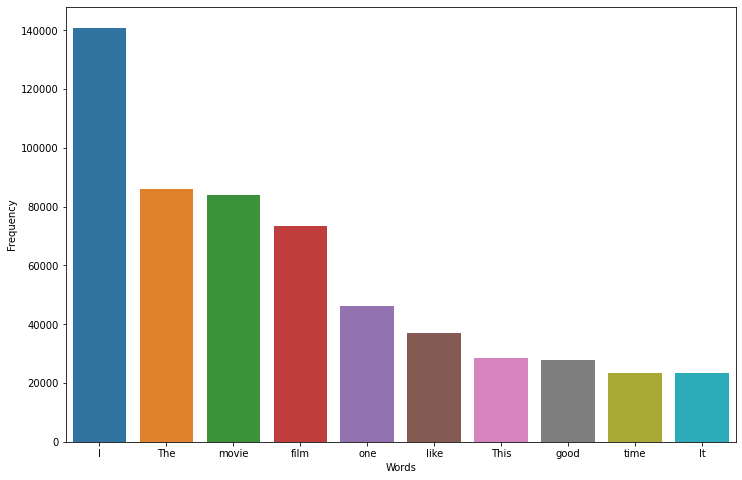

In [ ]:
pareto(reviews, 'treatment2', 10)

## **Treatment 3 - take off the accents**

In [ ]:
import unidecode

In [ ]:
no_accents = [unidecode.unidecode(text) for text in reviews.treatment2]

In [ ]:
no_accents[0]

'Once Mr Costner dragged movie far longer necessary Aside terrific sea rescue sequences I care characters Most us ghosts closet Costners character realized early forgotten much later time I care The character really care cocky overconfident Ashton Kutcher The problem comes kid thinks hes better anyone else around shows signs cluttered closet His obstacle appears winning Costner Finally well past half way point stinker Costner tells us Kutchers ghosts We told Kutcher driven best prior inkling foreshadowing No magic I could keep turning hour'

In [ ]:
reviews['treatment3'] = no_accents

In [ ]:
reviews.head()

,Reviews,Sentiment,sentiment_binary,treatment1,treatment2,treatment3
0,Once again Mr. Costner has dragged out a movie...,neg,0,Once Mr. Costner dragged movie far longer nece...,Once Mr Costner dragged movie far longer neces...,Once Mr Costner dragged movie far longer neces...
1,This is an example of why the majority of acti...,neg,0,This example majority action films same. Gener...,This example majority action films Generic bor...,This example majority action films Generic bor...
2,"First of all I hate those moronic rappers, who...",neg,0,"First I hate moronic rappers, couldnt act gun ...",First I hate moronic rappers couldnt act gun p...,First I hate moronic rappers couldnt act gun p...
3,Not even the Beatles could write songs everyon...,neg,0,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...
4,Brass pictures movies is not a fitting word fo...,neg,0,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...


### **Logistic regression after treatment 3**

In [ ]:
classification_text(reviews, 'treatment3', 'sentiment_binary', LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.54 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Naive Baiyes after treatment 3**

In [ ]:
classification_text(reviews, 'treatment3', 'sentiment_binary', GaussianNB())

Accuracy: 69.62 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
classification_text(reviews, 'treatment3', 'sentiment_binary', MultinomialNB())

Accuracy: 71.83 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Random forest after treament 3**

In [ ]:
classification_text(reviews, 'treatment3', 'sentiment_binary', RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 72.48 %


### **Support vector machine after treatment 3**

In [ ]:
classification_text(reviews, 'treatment3', 'sentiment_binary', SVC())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.61 %


## **Treatment 4 - normalizing the corpus**

In [ ]:
new_treatment = list()
for opinion in reviews.treatment3:
    opinion = opinion.lower()
    news2 = list()
    word_text2 = tokenize.WordPunctTokenizer().tokenize(opinion)
    for word in word_text2:
        if word not in more_irrelevants:
            news2.append(word)
    new_treatment.append(" ".join(news2))

reviews['treatment4'] = new_treatment

In [ ]:
reviews.head()

,Reviews,Sentiment,sentiment_binary,treatment1,treatment2,treatment3,treatment4
0,Once again Mr. Costner has dragged out a movie...,neg,0,Once Mr. Costner dragged movie far longer nece...,Once Mr Costner dragged movie far longer neces...,Once Mr Costner dragged movie far longer neces...,mr costner dragged movie far longer necessary ...
1,This is an example of why the majority of acti...,neg,0,This example majority action films same. Gener...,This example majority action films Generic bor...,This example majority action films Generic bor...,example majority action films generic boring t...
2,"First of all I hate those moronic rappers, who...",neg,0,"First I hate moronic rappers, couldnt act gun ...",First I hate moronic rappers couldnt act gun p...,First I hate moronic rappers couldnt act gun p...,first hate moronic rappers couldnt act gun pre...
3,Not even the Beatles could write songs everyon...,neg,0,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...,even beatles could write songs everyone liked ...
4,Brass pictures movies is not a fitting word fo...,neg,0,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...,brass pictures movies fitting word really some...


In [ ]:
reviews.Reviews[0]

'Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costners character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks hes better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutchers ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.'

### **One example after treatment 4**

In [ ]:
reviews.treatment4[0]

'mr costner dragged movie far longer necessary aside terrific sea rescue sequences care characters us ghosts closet costners character realized early forgotten much later time care character really care cocky overconfident ashton kutcher problem comes kid thinks hes better anyone else around shows signs cluttered closet obstacle appears winning costner finally well past half way point stinker costner tells us kutchers ghosts told kutcher driven best prior inkling foreshadowing magic could keep turning hour'

### **Logistic regression after treatment 4**

In [ ]:
classification_text(reviews, 'treatment4', 'sentiment_binary', LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.61 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Naive Baiyes after treatment 4**

In [ ]:
classification_text(reviews, 'treatment4', 'sentiment_binary', GaussianNB())

Accuracy: 69.25 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
classification_text(reviews, 'treatment4', 'sentiment_binary', MultinomialNB())

Accuracy: 71.73 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Random forest after treatment 4**

In [ ]:
classification_text(reviews, 'treatment4', 'sentiment_binary', RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 72.30 %


### **Support vector machine after treatment 4**

In [ ]:
classification_text(reviews, 'treatment4', 'sentiment_binary', SVC())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.99 %


## **Treatment 5 - Stemming the corpus**

In [ ]:
ps = PorterStemmer()

In [ ]:
new_treatment = list()
for opinion in reviews.treatment4:
    news2 = list()
    word_text2 = tokenize.WordPunctTokenizer().tokenize(opinion)
    for word in word_text2:
        if word not in more_irrelevants:
            news2.append(ps.stem(word))
    new_treatment.append(" ".join(news2))

reviews['treatment5'] = new_treatment

In [ ]:
reviews.head()

,Reviews,Sentiment,sentiment_binary,treatment1,treatment2,treatment3,treatment4,treatment5
0,Once again Mr. Costner has dragged out a movie...,neg,0,Once Mr. Costner dragged movie far longer nece...,Once Mr Costner dragged movie far longer neces...,Once Mr Costner dragged movie far longer neces...,mr costner dragged movie far longer necessary ...,mr costner drag movi far longer necessari asid...
1,This is an example of why the majority of acti...,neg,0,This example majority action films same. Gener...,This example majority action films Generic bor...,This example majority action films Generic bor...,example majority action films generic boring t...,exampl major action film gener bore there real...
2,"First of all I hate those moronic rappers, who...",neg,0,"First I hate moronic rappers, couldnt act gun ...",First I hate moronic rappers couldnt act gun p...,First I hate moronic rappers couldnt act gun p...,first hate moronic rappers couldnt act gun pre...,first hate moron rapper couldnt act gun press ...
3,Not even the Beatles could write songs everyon...,neg,0,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...,Not even Beatles could write songs everyone li...,even beatles could write songs everyone liked ...,even beatl could write song everyon like altho...
4,Brass pictures movies is not a fitting word fo...,neg,0,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...,Brass pictures movies fitting word really some...,brass pictures movies fitting word really some...,brass pictur movi fit word realli somewhat bra...


In [ ]:
reviews.Reviews[0]

'Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costners character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks hes better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutchers ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.'

### **One example after treatment 5**

In [ ]:
reviews.treatment5[0]

'mr costner drag movi far longer necessari asid terrif sea rescu sequenc care charact us ghost closet costner charact realiz earli forgotten much later time care charact realli care cocki overconfid ashton kutcher problem come kid think he better anyon els around show sign clutter closet obstacl appear win costner final well past half way point stinker costner tell us kutcher ghost told kutcher driven best prior inkl foreshadow magic could keep turn hour'

### **Logistic regression after treatment 5**

In [ ]:
classification_text(reviews, 'treatment5', 'sentiment_binary', LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 75.05 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Naive Baiyes after treatment 5**

In [ ]:
classification_text(reviews, 'treatment5', 'sentiment_binary', GaussianNB())

Accuracy: 71.95 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
classification_text(reviews, 'treatment5', 'sentiment_binary', MultinomialNB())

Accuracy: 73.04 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Random forest after treatment 5**

In [ ]:
classification_text(reviews, 'treatment5', 'sentiment_binary', RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 73.59 %


### **Support vector machine after treatment 5**

In [ ]:
classification_text(reviews, 'treatment5', 'sentiment_binary', SVC())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 74.94 %


## **Using the TIFDF tecnique to represent the corpus**

In [ ]:
def classification_text_tifdf(text, column_text, column_sentiment, modelo):
  tfidf = TfidfVectorizer(max_features = 1500, ngram_range = (1,2))
  tfidf_final = tfidf.fit_transform(text[column_text])
  train_X, test_X, train_y, test_y = train_test_split(tfidf_final, text[column_sentiment], random_state = 42)
  model = modelo
  if modelo == GaussianNB() or MultinomialNB():
    model.fit(train_X.todense(), train_y)
    Accuracy = model.score(test_X.todense(), test_y)*100
    print(f'Accuracy: {Accuracy:.2f} %')
  else:
    model.fit(train_X, train_y)
    Accuracy = model.score(test_X, test_y)*100
    print(f'Accuracy: {Accuracy:.2f} %')

### **Classification without any treatment usign the tifdf representation**

### **Logistic regression**

In [ ]:
classification_text_tifdf(reviews, 'Reviews', 'sentiment_binary', LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 87.29 %


### **Naive Baiyes**

In [ ]:
classification_text_tifdf(reviews, 'Reviews', 'sentiment_binary', GaussianNB())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 82.94 %


In [ ]:
classification_text_tifdf(reviews, 'Reviews', 'sentiment_binary', MultinomialNB())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 83.76 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


### **Random forest**

In [ ]:
classification_text_tifdf(reviews, 'Reviews', 'sentiment_binary', RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 83.23 %


### **Support vector machine**

In [ ]:
classification_text_tifdf(reviews, 'Reviews', 'sentiment_binary', SVC())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 87.77 %


## **Classification after treament 5 with tifdf representation**

### **Logistic regression**

In [ ]:
classification_text_tifdf(reviews, 'treatment5', 'sentiment_binary', LogisticRegression())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 87.89 %


### **Naive Baiyes**

In [ ]:
classification_text_tifdf(reviews, 'treatment5', 'sentiment_binary', GaussianNB())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 82.03 %


In [ ]:
classification_text_tifdf(reviews, 'treatment5', 'sentiment_binary', MultinomialNB())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 84.50 %


### **Random forest**

In [ ]:
classification_text_tifdf(reviews, 'treatment5', 'sentiment_binary', RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 84.25 %


### **Support vector machine**

In [ ]:
classification_text_tifdf(reviews, 'treatment5', 'sentiment_binary', SVC())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Accuracy: 87.97 %


## **Ploting ROC curve and confusion matrix**

### **Logistic regression parameters**

In [ ]:
tfidf = TfidfVectorizer(max_features = 1500, ngram_range = (1,2))
tfidf_final = tfidf.fit_transform(reviews['treatment5'])
train_X, test_X, train_y, test_y = train_test_split(tfidf_final, reviews['sentiment_binary'], random_state = 42)
model_LR = LogisticRegression()
model_LR.fit(train_X, train_y)
pred_prob_LR = model_LR.predict_proba(test_X)
predictions_LR = model_LR.predict(test_X)

In [ ]:
fpr_LR, tpr_LR, thresh_LR = roc_curve(test_y, pred_prob_LR[:,1], pos_label=1)

In [ ]:
auc_score_lr = roc_auc_score(test_y, pred_prob_LR[:,1])
print(f'AUC -Logistic regression: {auc_score_lr:.2f}')

AUC -Logistic regression: 0.95


### **Naive Baiyes parameters**

In [ ]:
tfidf = TfidfVectorizer(max_features = 1500, ngram_range = (1,2))
tfidf_final = tfidf.fit_transform(reviews['treatment5'])
train_X, test_X, train_y, test_y = train_test_split(tfidf_final, reviews['sentiment_binary'], random_state = 42)
model_GB = GaussianNB()
model_GB.fit(train_X.todense(), train_y)
pred_prob_GB = model_GB.predict_proba(test_X.todense())
predictions_GB = model_GB.predict(test_X.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
fpr_GB, tpr_GB, thresh_GB = roc_curve(test_y, pred_prob_GB[:,1], pos_label=1)

In [ ]:
auc_score_GB = roc_auc_score(test_y, pred_prob_GB[:,1])
print(f'AUC - Gaussian Bayesian: {auc_score_GB:.2f}')

AUC - Gaussian Bayesian: 0.87


In [ ]:
tfidf = TfidfVectorizer(max_features = 1500, ngram_range = (1,2))
tfidf_final = tfidf.fit_transform(reviews['treatment5'])
train_X, test_X, train_y, test_y = train_test_split(tfidf_final, reviews['sentiment_binary'], random_state = 42)
model_NB = MultinomialNB()
model_NB.fit(train_X.todense(), train_y)
pred_prob_NB = model_NB.predict_proba(test_X.todense())
predictions_NB = model_NB.predict(test_X.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


In [ ]:
fpr_NB, tpr_NB, thresh_NB = roc_curve(test_y, pred_prob_NB[:,1], pos_label=1)

In [ ]:
auc_score_NB = roc_auc_score(test_y, pred_prob_NB[:,1])
print(f'AUC - Multinomial Bayesian: {auc_score_NB:.2f}')

AUC - Multinomial Bayesian: 0.92


### **Random forest parameters**

In [ ]:
tfidf = TfidfVectorizer(max_features = 1500, ngram_range = (1,2))
tfidf_final = tfidf.fit_transform(reviews['treatment5'])
train_X, test_X, train_y, test_y = train_test_split(tfidf_final, reviews['sentiment_binary'], random_state = 42)
model_RF = RandomForestClassifier()
model_RF.fit(train_X, train_y)
pred_prob_RF = model_RF.predict_proba(test_X)
predictions_RF = model_RF.predict(test_X)

In [ ]:
fpr_RF, tpr_RF, thresh_RF = roc_curve(test_y, pred_prob_RF[:,1], pos_label=1)

In [ ]:
auc_score_RF = roc_auc_score(test_y, pred_prob_RF[:,1])
print(f'AUC - Random forest: {auc_score_RF:.2f}')

AUC - Random forest: 0.92


### **Support vector machine parameters**

In [ ]:
tfidf = TfidfVectorizer(max_features = 1500, ngram_range = (1,2))
tfidf_final = tfidf.fit_transform(reviews['treatment5'])
train_X, test_X, train_y, test_y = train_test_split(tfidf_final, reviews['sentiment_binary'], random_state = 42)
model = SVC(probability = True)
model.fit(train_X, train_y)
pred_prob_SM = model.predict_proba(test_X)
predictions_SM = model.predict(test_X)

In [ ]:
fpr_SM, tpr_SM, thresh_SM = roc_curve(test_y, pred_prob_SM[:,1], pos_label=1)

In [ ]:
auc_score_SM = roc_auc_score(test_y, pred_prob_SM[:,1])
print(f'AUC - Support vector machine: {auc_score_SM:.2f}')

AUC - Support vector machine: 0.95


### **Random algorithm to plot the straight line in roc curve**

In [ ]:
random_probs = [0 for i in range(len(test_y))]
p_fpr, p_tpr, _ = roc_curve(test_y, random_probs, pos_label=1)

### **Roc curve**

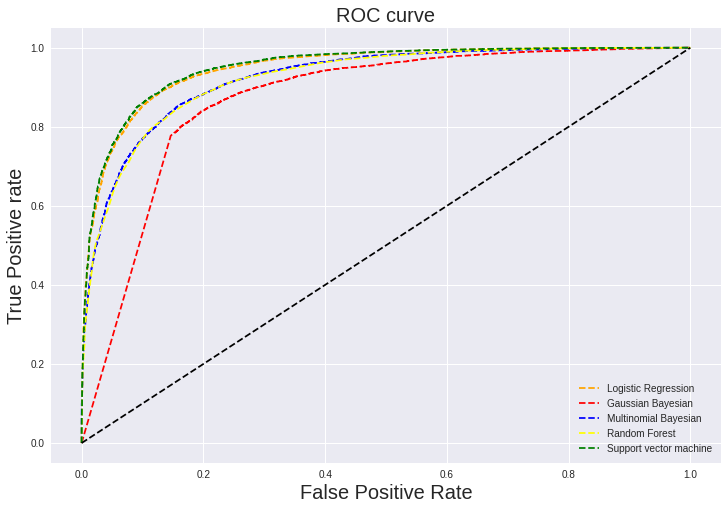

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
fig = plt.figure(figsize = (12,8) )
plt.plot(fpr_LR, tpr_LR, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr_GB, tpr_GB, linestyle='--',color='red', label='Gaussian Bayesian')
plt.plot(fpr_NB, tpr_NB, linestyle='--',color='blue', label='Multinomial Bayesian')
plt.plot(fpr_RF, tpr_RF, linestyle='--',color='yellow', label='Random Forest')
plt.plot(fpr_SM, tpr_SM, linestyle='--',color='green', label='Support vector machine')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 20)
# y label
plt.ylabel('True Positive rate', fontsize = 20)
plt.legend(loc='best',fontsize = 10)
plt.savefig('ROC',dpi=300)
plt.show();

## **Confusion Matrixes**

### **Logistic Regression**

<Figure size 864x576 with 0 Axes>

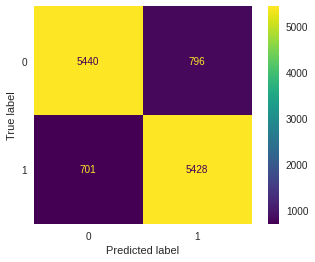

In [ ]:
fig_LR = plt.figure(figsize = (12,8))
cm_LR = confusion_matrix(test_y, predictions_LR, labels = model_LR.classes_)
disp_LR = ConfusionMatrixDisplay(confusion_matrix = cm_LR, display_labels = model_LR.classes_)
disp_LR.plot()
plt.grid(False)
plt.show()

### **Naive Baiyes**

### **Gaussian Bayesian**

<Figure size 864x576 with 0 Axes>

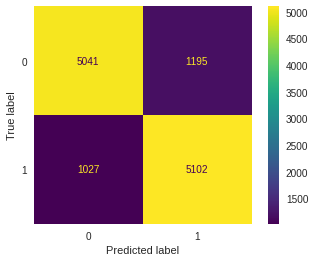

In [ ]:
fig_GB = plt.figure(figsize = (12,8))
cm_GB = confusion_matrix(test_y, predictions_GB, labels = model_GB.classes_)
disp_GB = ConfusionMatrixDisplay(confusion_matrix = cm_GB, display_labels = model_GB.classes_)
disp_GB.plot()
plt.grid(False)
plt.show()

### **Multinomial Bayesian**

<Figure size 864x576 with 0 Axes>

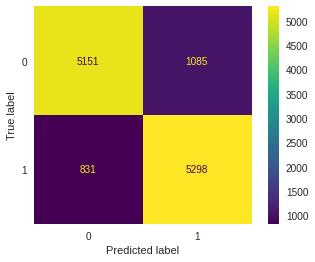

In [ ]:
fig_NB = plt.figure(figsize = (12,8))
cm_NB = confusion_matrix(test_y, predictions_NB, labels = model_NB.classes_)
disp_NB = ConfusionMatrixDisplay(confusion_matrix = cm_NB, display_labels = model_NB.classes_)
disp_NB.plot()
plt.grid(False)
plt.show()

### **Random Forest**

<Figure size 864x576 with 0 Axes>

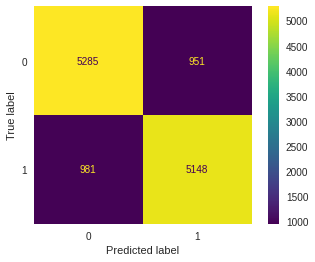

In [ ]:
fig_RF = plt.figure(figsize = (12,8))
cm_RF = confusion_matrix(test_y, predictions_RF, labels = model_RF.classes_)
disp_RF = ConfusionMatrixDisplay(confusion_matrix = cm_RF, display_labels = model_RF.classes_)
disp_RF.plot()
plt.grid(False)
plt.show()

### **Support vector machine**

<Figure size 864x576 with 0 Axes>

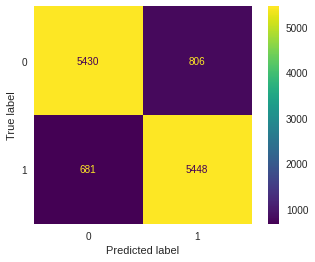

In [ ]:
fig_sm = plt.figure(figsize = (12,8))
cm_sm = confusion_matrix(test_y, predictions_SM, labels = model.classes_)
disp_sm = ConfusionMatrixDisplay(confusion_matrix = cm_sm, display_labels = model.classes_)
disp_sm.plot()
plt.grid(False)
plt.show()

## **Weights of the words of most relevance in corpus**

### **We will build a new word cloud with the most relevance word in corpus. Since, both logistic regression are the best classifier in the experiments and the AUC of the two are practly the same, we choose the logistic regression coeficients and indexes to show the words of most relevance of the corpus**

### **Logistic Regression weights**

In [ ]:
weights_LR = pd.DataFrame(model_LR.coef_[0].T, index = tfidf.get_feature_names())
weights_LR.nlargest(50,0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0
excel,6.576509
great,6.152171
perfect,4.922506
enjoy,4.746486
amaz,4.652306
brilliant,4.522792
hilari,4.375655
favorit,4.350070
highli recommend,4.185522
best,4.116393


In [ ]:
weights_LR.nsmallest(50,0)

,0
worst,-9.235694
aw,-7.675042
wast,-7.435367
bad,-6.409169
bore,-6.126275
terribl,-5.834363
disappoint,-5.494775
poor,-5.471237
horribl,-5.358043
poorli,-5.151774


In [ ]:
list_cloudPositive = list()
for i in weights_LR.nlargest(50,0).index:
  list_cloudPositive.append(i)
  
list_cloudPositive = ' '.join(list_cloudPositive)

## **Word Clouds**

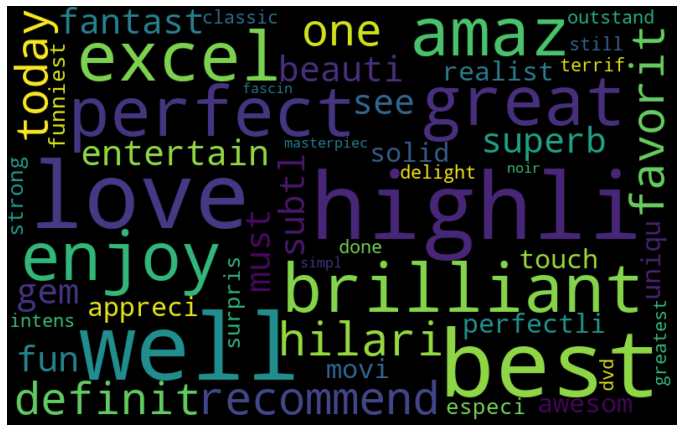

In [ ]:
model_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False)
word_cloud = model_cloud.generate(list_cloudPositive)
fig = plt.figure(figsize = (12,8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
list_cloudNegative = list()
for i in weights_LR.nsmallest(50,0).index:
  list_cloudNegative.append(i)

list_cloudNegative = ' '.join(list_cloudNegative)

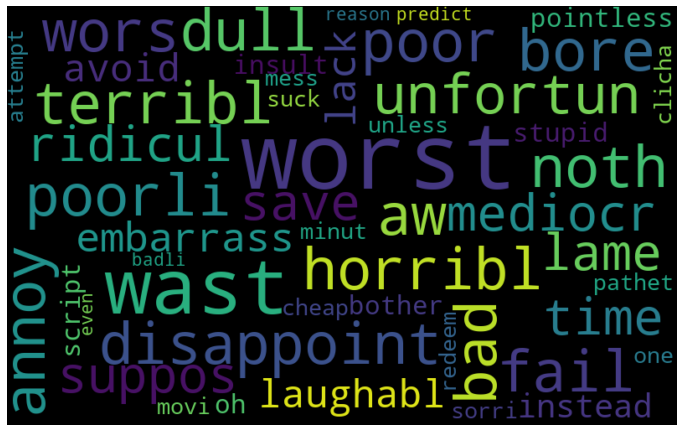

In [ ]:
model_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False)
word_cloud = model_cloud.generate(list_cloudNegative)
fig = plt.figure(figsize = (12,8))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## **Organizing the texts in positive, negative and neutral sentiment**

- ### **Positive: the prediction of probability greater to 0.7**

- ### **Neutral: the prediction of probability between 0.5 and 0.7**

- ### **Negative: the prediction of probability less than 0.5**


In [ ]:
all_classification = list()
for i in pred_prob_LR[:, 1]:
  if i > 0.7:
    i = 1
    all_classification.append(i)
  elif i >= 0.5 and i <= 0.7:
    i = 0.5
    all_classification.append(i)
  elif i < 0.5:
    i = 0
    all_classification.append(i)

In [ ]:
classification_texts_estimation =list(zip(all_classification, test_y.index ))

In [ ]:
result = pd.DataFrame(classification_texts_estimation, columns = ['Classification', 'Index_corpus'])
result.head()

,Classification,Index_corpus
0,1.0,12532
1,0.0,35445
2,0.5,20279
3,0.0,2969
4,1.0,45161


### **Positive documents**

In [ ]:
positive_index = list()
for i in result.query("Classification == 1.0")['Index_corpus']:
  positive_index.append(i)

In [ ]:
positive_reviews = reviews.loc[positive_index]

In [ ]:
positive_reviews.drop(['Sentiment', 'sentiment_binary', 'treatment1',
                                                     'treatment2', 'treatment3', 'treatment4', 'treatment5'], axis = 1, inplace = True)

In [ ]:
positive_reviews.head()

,Reviews
12532,This was unusual: a modern-day film which was ...
45161,"Othello, the classic Shakespearen story of lov..."
42648,"Bravo to Czechs, their once-powerful movie ind..."
17897,"So its not an award winner, so what? Have you ..."
47609,A remarkable example of cinematic alchemy at w...


### **Neutral documents**

In [ ]:
neutral_index = list()
for i in result.query("Classification == 0.5")['Index_corpus']:
  neutral_index.append(i)

In [ ]:
neutral_reviews = reviews.loc[neutral_index]

In [ ]:
neutral_reviews.drop(['Sentiment', 'sentiment_binary', 'treatment1',
                                                     'treatment2', 'treatment3', 'treatment4', 'treatment5'], axis = 1, inplace = True)


In [ ]:
neutral_reviews.head()

,Reviews
20279,What a pleasure. This is really a parody. Only...
41126,Guy Kibbee gives the viewer a lot of laughs. L...
21992,The best screen performance ever by George C. ...
13504,Niagra Niagra was certainly not the best movie...
27156,The film starts with a voice over telling the ...


### **Negative documents**

In [ ]:
negative_index = list()
for i in result.query("Classification == 0.0")['Index_corpus']:
  negative_index.append(i)

In [ ]:
negative_reviews = reviews.loc[negative_index]

In [ ]:
negative_reviews.drop(['Sentiment', 'sentiment_binary', 'treatment1',
                                                     'treatment2', 'treatment3', 'treatment4', 'treatment5'], axis = 1, inplace = True)

In [ ]:
negative_reviews.head()

,Reviews
35445,Some of my old friends suggested me to watch t...
2969,There are about ten minutes about half way thr...
4569,A man is builing a hotel with a partner. He fi...
32399,People like me will tear this movie apart. Its...
36796,When the employees of a theater find an old re...


## **Saving the csvs files**

In [ ]:
reviews.to_csv("final_reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
positive_reviews.to_csv("Positive_Reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
neutral_reviews.to_csv("Neutral_reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
negative_reviews.to_csv("Negative_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>